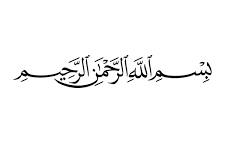

**Import Required Libraries**

In [1]:
!pip install arabic-reshaper

In [2]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 4.6 MB/s eta 0:00:00


In [3]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import pandas as pd
import re


#**Import Arabic Dataset**

In [12]:
import pandas as pd
data=pd.read_csv('/content/Arabic-Original.csv')

In [13]:
data.head()

,1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
0,1|2|الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
1,1|3|الرَّحْمَٰنِ الرَّحِيمِ
2,1|4|مَالِكِ يَوْمِ الدِّينِ
3,1|5|إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
4,1|6|اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ


#Preprocessing

In [14]:
# Split the column into 3 parts: Surah, Ayah, and Arabic text
data[['Surah', 'Ayah', 'text']] = data['1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ'].str.split('|', expand=True)

# Drop the original combined column if it's no longer needed
data.drop(columns=['1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ'], inplace=True)

In [15]:
print(data.head())
data.info()

  Surah Ayah                                      text
0     1    2     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
1     1    3                   الرَّحْمَٰنِ الرَّحِيمِ
2     1    4                   مَالِكِ يَوْمِ الدِّينِ
3     1    5  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
4     1    6        اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6235 entries, 0 to 6234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6235 non-null   object
 1   Ayah    6235 non-null   object
 2   text    6235 non-null   object
dtypes: object(3)
memory usage: 146.3+ KB


#Normalization Function

In [16]:
# Function to normalize and remove diacritics from Arabic text
def normalize_arabic(text):
    text = re.sub(r'[ًٌٍَُِّْ]', '', text)  # Remove Arabic diacritics (Tashkeel)
    return text


# Word Cloud Generation

In [17]:
# Function to generate word clouds for specific words and their context
def print_similar_word_cloud(target_word, output_path):
    # Step 1: Use the data from your DataFrame
    df = data

    # Step 2: Clean the data - drop NaN values in the text column
    df = df.dropna(subset=['text'])

    # Step 3: Normalize both the target word and the text in the DataFrame
    df['text'] = df['text'].apply(normalize_arabic)
    target_word = normalize_arabic(target_word)

    # Step 4: Filter rows containing the target word
    filtered_text = ' '.join(df[df['text'].str.contains(target_word)]['text'].astype(str))

    if not filtered_text:
        print(f"No instances of the word '{target_word}' were found.")
        return

    # Step 5: Reshape Arabic text for proper display
    reshaped_text = arabic_reshaper.reshape(filtered_text)  # Reshaping for proper display
    return reshaped_text


#Word Frequency and WordCloud

In [18]:
def create_wordcloud(reshaped_text, output_path):
    # Step 6: Split reshaped text into words and create a frequency dictionary
    words = reshaped_text.split()  # Split based on spaces or punctuation
    word_freq = Counter(words)  # Count the frequency of each word

    if len(word_freq) == 0:
        print(f"No words found after filtering text")
        return

    # Step 7: Create the WordCloud object
    try:
        wordcloud = WordCloud(
            font_path='/content/Tahoma (2).ttf',  # Path to a proper Arabic font
            width=800,
            height=400,
            background_color='white'
        ).generate_from_frequencies(word_freq)

        # Step 8: Save the WordCloud to file
        wordcloud.to_file(output_path)

        # Step 9: Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"Error creating word cloud: {e}")


#Run the Function

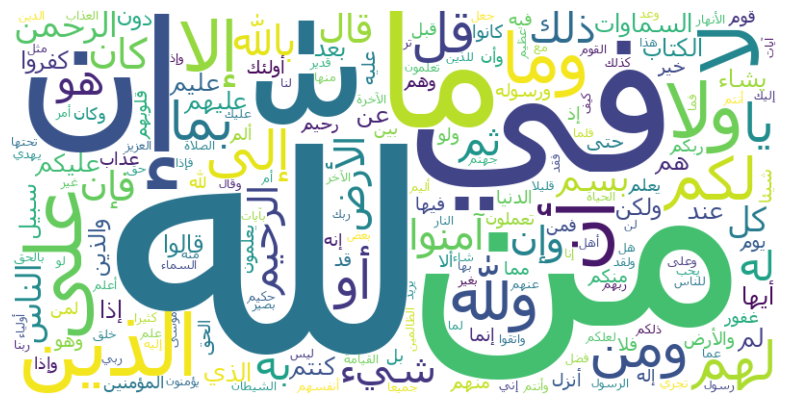

In [19]:
# Example usage
reshaped_text = print_similar_word_cloud('الله', '/content/allah_wordcloud.png')
if reshaped_text:
    create_wordcloud(reshaped_text, '/content/allah_wordcloud.png')


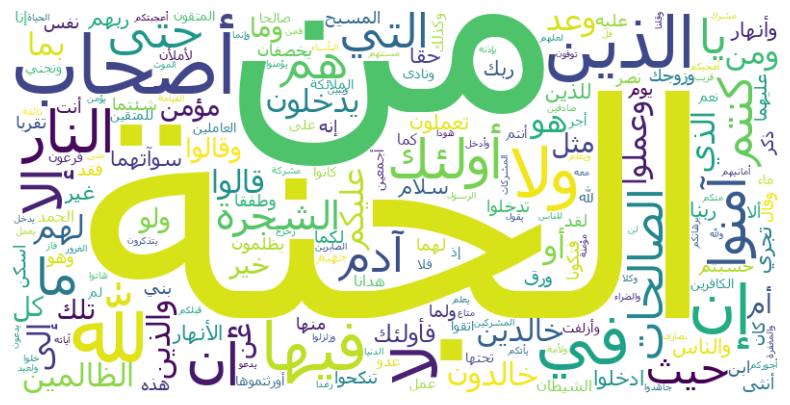

In [20]:
# Example usage
reshaped_text = print_similar_word_cloud('الجنة', '/content/allah_wordcloud.png')
if reshaped_text:
    create_wordcloud(reshaped_text, '/content/allah_wordcloud.png')
